In [121]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, accuracy_score

In [91]:
# Installation and import of Pandas Profiling which is now ydata profiling apparently
# !pip install pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [147]:
# Generating report
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
sub_cols_hyp = df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 19]].tolist()
sub_cols_rfe_8 = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Stroke', 'GenHlth', 'Sex', 'Age', 'Income']
sub_cols_rfe_5 = ['HeartDiseaseorAttack', 'HighChol', 'Stroke', 'GenHlth', 'Sex', 'Age']
df = df[sub_cols_rfe_8]
df
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Stroke,GenHlth,Sex,Age,Income
0,0.0,1.0,1.0,1.0,0.0,5.0,0.0,9.0,3.0
1,0.0,0.0,0.0,0.0,0.0,3.0,0.0,7.0,1.0
2,0.0,1.0,1.0,1.0,0.0,5.0,0.0,9.0,8.0
3,0.0,1.0,0.0,1.0,0.0,2.0,0.0,11.0,6.0
4,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,0.0,3.0,1.0,5.0,7.0
253676,0.0,1.0,1.0,1.0,0.0,4.0,0.0,11.0,4.0
253677,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0
253678,0.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0


In [148]:
# make evenly split dataframe using all positive diagnoses and a random sample from negative diagnoses
df_ones = df[df['HeartDiseaseorAttack'] == 1]
df_zeros = df[df['HeartDiseaseorAttack'] == 0]
df_zeros_sampled = df_zeros.sample(n=len(df_ones), random_state=42)
df_balanced = pd.concat([df_ones, df_zeros_sampled], axis=0)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Stroke,GenHlth,Sex,Age,Income
0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,7.0
1,1.0,1.0,0.0,1.0,0.0,3.0,1.0,13.0,5.0
2,1.0,1.0,1.0,1.0,1.0,4.0,0.0,11.0,2.0
3,1.0,1.0,0.0,1.0,1.0,3.0,1.0,6.0,8.0
4,0.0,1.0,1.0,1.0,0.0,4.0,0.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...
47781,1.0,1.0,1.0,1.0,0.0,4.0,0.0,13.0,3.0
47782,0.0,0.0,0.0,1.0,0.0,2.0,1.0,11.0,8.0
47783,0.0,1.0,1.0,1.0,0.0,3.0,0.0,10.0,3.0
47784,1.0,1.0,1.0,1.0,0.0,4.0,1.0,9.0,4.0


In [149]:
# Scale data and split into X and y then test and train, uncomment first X and y and comment out the second for all data
# X = df.iloc[:, 1:]
# y = df.iloc[:, 0]
X = df_balanced.iloc[:, 1:]
y = df_balanced.iloc[:, 0]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
X_train

array([[0.        , 0.        , 1.        , ..., 0.        , 0.58333333,
        0.85714286],
       [0.        , 0.        , 1.        , ..., 0.        , 0.75      ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 0.08333333,
        0.85714286],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.85714286],
       [1.        , 0.        , 1.        , ..., 1.        , 0.75      ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.75      ,
        0.85714286]])

In [151]:
# SGD Classifier
sgd = SGDClassifier()
param_grid_sgd = {'loss': ['hinge', 'log_loss'], 'penalty': ['l1'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']}
grid_sgd = GridSearchCV(sgd, param_grid_sgd, cv=8, n_jobs=6, refit=True, scoring='f1')
grid_sgd.fit(X_train, y_train)

C:\Users\imcpa\OneDrive\Documents\Data Science at DU\FinalQuarter\DST2 Things\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
192 fits failed out of a total of 256.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
192 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\imcpa\OneDrive\Documents\Data Science at DU\FinalQuarter\DST2 Things\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\imcpa\OneDrive\Documents\Data Science at DU\FinalQuarter\DST2 Things\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 892, in fit
    self._more_val

GridSearchCV(cv=8, estimator=SGDClassifier(), n_jobs=6,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log_loss'], 'penalty': ['l1']},
             scoring='f1')

In [152]:
# Random Forest
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 3, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=8, n_jobs = 6, refit = True, scoring='f1')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'max_depth': [None, 3, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [153]:
# KNN
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7,11,19], 'weights':['uniform', 'distance']}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=8, n_jobs = 6, refit = True, scoring='f1')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': [3, 5, 7, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [154]:
# Linear SVC
svc = LinearSVC()
# print(svc.get_params().keys())
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000], 'max_iter': [2500]}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=8, n_jobs = 6, refit = True, scoring='f1')
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=LinearSVC(), n_jobs=6,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'max_iter': [2500]},
             scoring='f1')

In [155]:
# SVC
svc2 = SVC()
param_grid_svc2 = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'], 'max_iter': [2500]}
grid_svc2 = GridSearchCV(svc2, param_grid_svc2, cv=8, n_jobs = 6, refit = True, scoring='f1')
grid_svc2.fit(X_train, y_train)

C:\Users\imcpa\OneDrive\Documents\Data Science at DU\FinalQuarter\DST2 Things\venv\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=8, estimator=SVC(), n_jobs=6,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf'], 'max_iter': [2500]},
             scoring='f1')

In [156]:
def trainingMetrics(model, xtrain, ytrain):
    y_pred_train = model.predict(xtrain)
    accuracy_train = accuracy_score(ytrain, y_pred_train)
    f1_train = f1_score(ytrain, y_pred_train)
    return f"Training Accuracy: {accuracy_train}, Training F1: {f1_train}"

In [157]:
print("SGD best params: ", grid_sgd.best_params_, trainingMetrics(grid_sgd, X_train, y_train))
print("Random Forest best params: ", grid_rf.best_params_, trainingMetrics(grid_rf, X_train, y_train))
print("KNN best params: ", grid_knn.best_params_, trainingMetrics(grid_knn, X_train, y_train))
print("Linear SVC best params: ", grid_svc.best_params_, trainingMetrics(grid_svc, X_train, y_train))
print("SVC best params: ", grid_svc2.best_params_, trainingMetrics(grid_svc2, X_train, y_train))

SGD best params:  {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'} Training Accuracy: 0.7693572496263079, Training F1: 0.77831096807563
Random Forest best params:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50} Training Accuracy: 0.7832585949177877, Training F1: 0.7921683293200321
KNN best params:  {'n_neighbors': 19, 'weights': 'uniform'} Training Accuracy: 0.7805381165919283, Training F1: 0.7875806591625916
Linear SVC best params:  {'C': 1, 'max_iter': 2500} Training Accuracy: 0.7690284005979073, Training F1: 0.775524434888721
SVC best params:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 2500} Training Accuracy: 0.6320777279521674, Training F1: 0.724632492784105


In [102]:
y_pred_sgd = grid_sgd.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)
y_pred_knn = grid_knn.predict(X_test)
y_pred_svc = grid_svc.predict(X_test)
y_pred_svc2 = grid_svc2.predict(X_test)

In [103]:
# This code would retrain models with the best estimators' parameters
# sgd_best = SGDClassifier(alpha = 0.001, learning_rate = 'optimal', loss = 'hinge', penalty = 'l1')
# rf_best = RandomForestClassifier(max_depth = 5, min_samples_split = 10, n_estimators = 100)
# knn_best = KNeighborsClassifier(n_neighbors = 19, weights = 'uniform')
# svc_best = LinearSVC(C = 10, max_iter = 2500)
# svc_rbf_best = SVC(C = 0.1, gamma = 0.1, kernel = 'rbf', max_iter = 2500)
#
# sgd_best.fit(X_train, y_train)
# rf_best.fit(X_train, y_train)
# knn_best.fit(X_train, y_train)
# svc_best.fit(X_train, y_train)
# svc2_best.fit(X_train, y_train)

In [104]:
def scores_func(estimator, ytest, ypred):
    print(f'{estimator} scores: ')
    cr = classification_report(ytest, ypred)
    print(cr)
    cm = confusion_matrix(ytest, ypred)
    ps = precision_score(ytest, ypred)
    rs = recall_score(ytest, ypred)
    acc = accuracy_score(ytest, ypred)
    f1s = f1_score(ytest, ypred)
    print(f'Accuracy: {acc}')
    print(f'F1 Score: {f1s}')
    print(f'Precision: {ps}')
    print(f'Recall: {rs}')
    disp = ConfusionMatrixDisplay.from_predictions(ytest, ypred)

SGD Classifier scores: 
              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74      7150
         1.0       0.73      0.81      0.77      7186

    accuracy                           0.75     14336
   macro avg       0.76      0.75      0.75     14336
weighted avg       0.76      0.75      0.75     14336

Accuracy: 0.7527204241071429
F1 Score: 0.7669143270431981
Precision: 0.7269101333665711
Recall: 0.8115780684664625


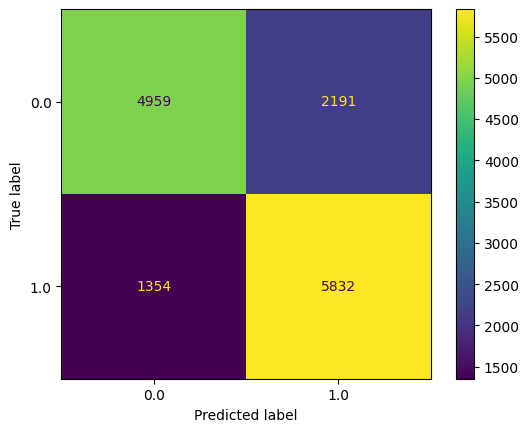

In [105]:
# SGD Classifier Scores
scores_func('SGD Classifier', y_test, y_pred_sgd)

Random Forest scores: 
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7150
         1.0       0.73      0.80      0.77      7186

    accuracy                           0.75     14336
   macro avg       0.76      0.75      0.75     14336
weighted avg       0.76      0.75      0.75     14336

Accuracy: 0.7539760044642857
F1 Score: 0.7653203805975115
Precision: 0.7332653321433125
Recall: 0.8003061508488728


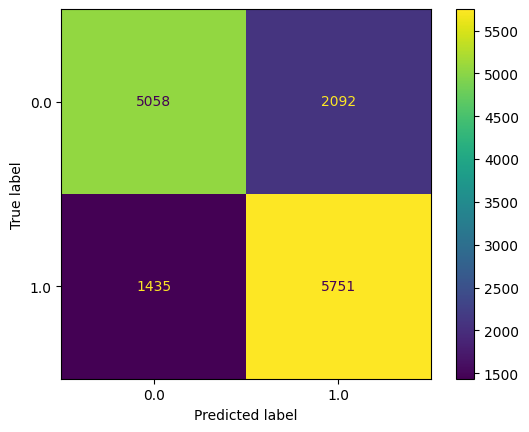

In [106]:
# Random Forest Scores
scores_func('Random Forest', y_test, y_pred_rf)

K-Nearest Neighbors scores: 
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      7150
         1.0       0.75      0.77      0.76      7186

    accuracy                           0.75     14336
   macro avg       0.75      0.75      0.75     14336
weighted avg       0.75      0.75      0.75     14336

Accuracy: 0.75390625
F1 Score: 0.7582568178703576
Precision: 0.7468952483801296
Recall: 0.7699693849151127


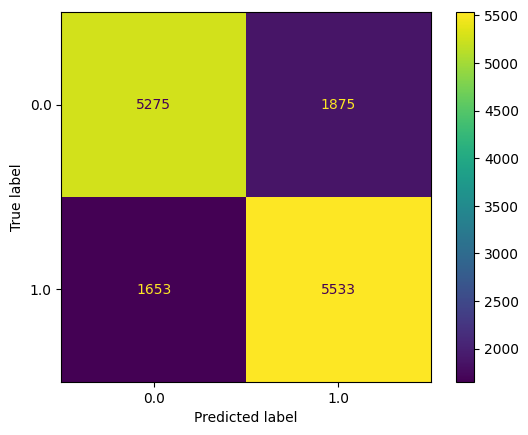

In [107]:
# K-Nearest Neighbors Scores
scores_func('K-Nearest Neighbors', y_test, y_pred_knn)

Linear SVC scores: 
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      7150
         1.0       0.75      0.77      0.76      7186

    accuracy                           0.75     14336
   macro avg       0.76      0.75      0.75     14336
weighted avg       0.76      0.75      0.75     14336

Accuracy: 0.7548828125
F1 Score: 0.7600054637344624
Precision: 0.746244635193133
Recall: 0.7742833286946841


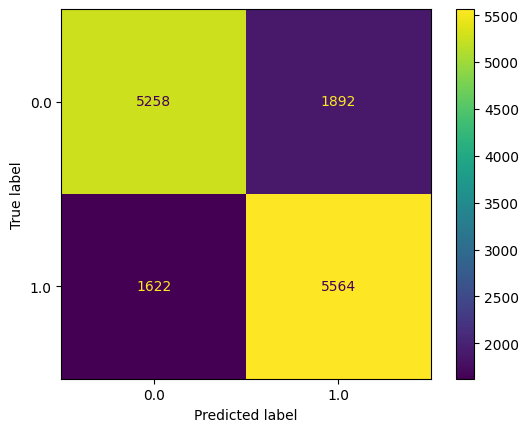

In [108]:
# Linear SVC Scores
scores_func('Linear SVC', y_test, y_pred_svc)

General SVC scores: 
              precision    recall  f1-score   support

         0.0       0.89      0.28      0.43      7150
         1.0       0.58      0.97      0.72      7186

    accuracy                           0.63     14336
   macro avg       0.73      0.62      0.58     14336
weighted avg       0.73      0.63      0.58     14336

Accuracy: 0.6257672991071429
F1 Score: 0.721284222557016
Precision: 0.5754787366326785
Recall: 0.9660450876704704


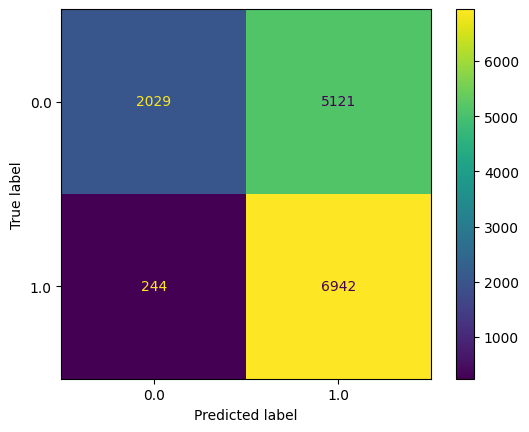

In [109]:
# General SVC Scores
scores_func('General SVC', y_test, y_pred_svc2)

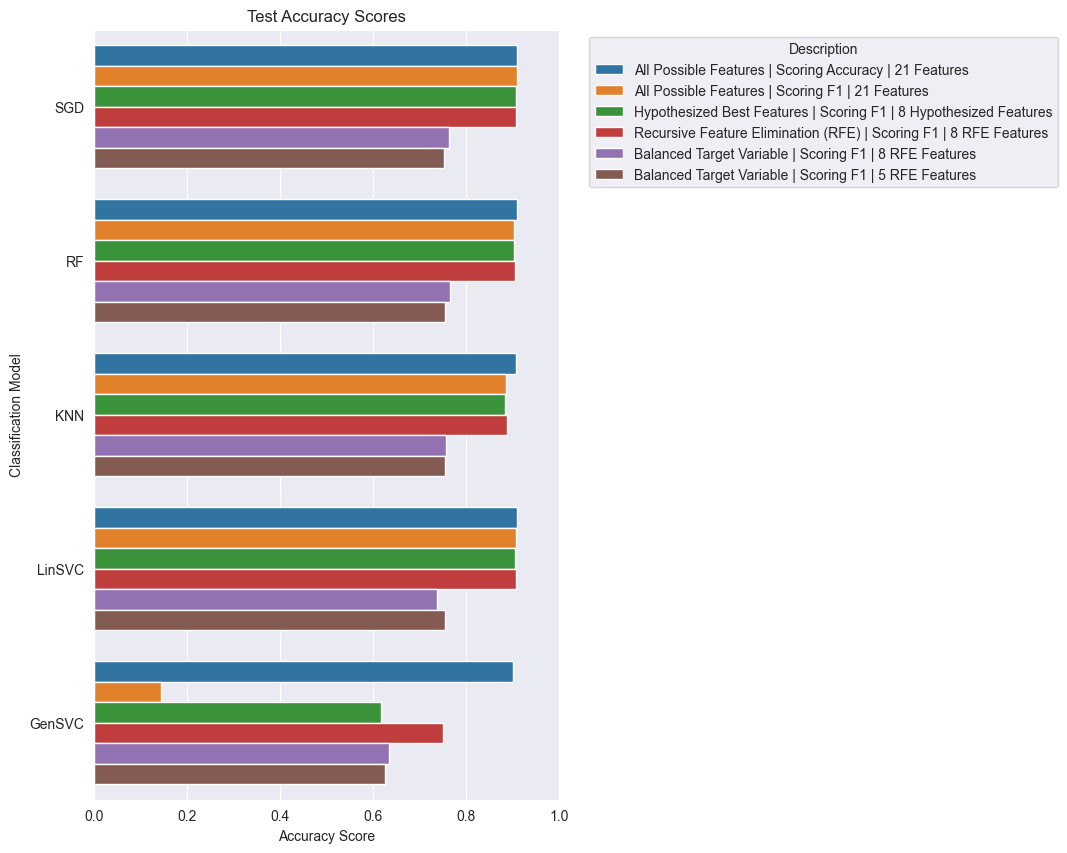

<Figure size 640x480 with 0 Axes>

In [139]:
acc_df = pd.read_csv('DST2 Acc Results.csv')
acc_df
acc_df_t = acc_df.set_index('Description').T.reset_index()
acc_df_melt = acc_df_t.melt(id_vars='index', var_name='Description', value_name='Value')

plt.figure(figsize=(6, 10))
sns.set_style("darkgrid")
sns.barplot(x='Value', y='index', hue='Description', data=acc_df_melt)
plt.xlabel('Accuracy Score')
plt.ylabel('Classification Model')
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Test Accuracy Scores')
plt.xlim(0,1)
plt.show()

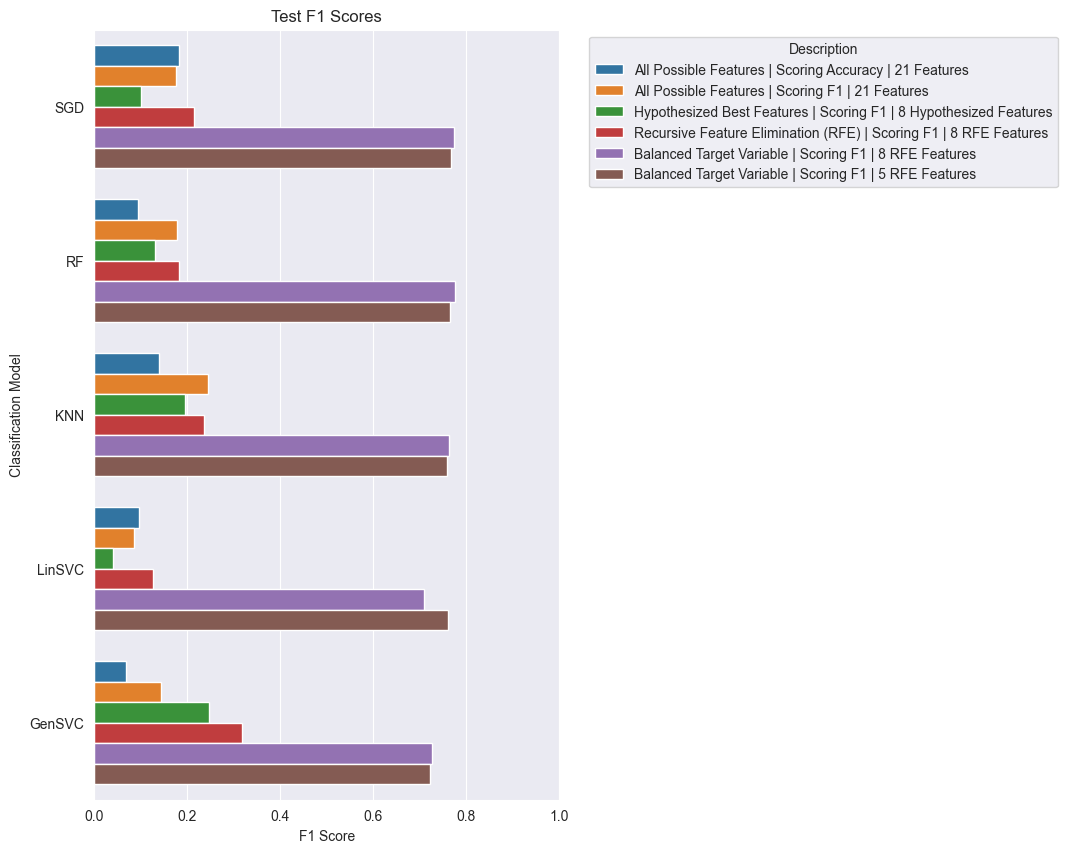

<Figure size 640x480 with 0 Axes>

In [140]:
f1_df = pd.read_csv('DST2 F1 Results.csv')
f1_df
f1_df_t = f1_df.set_index('Description').T.reset_index()
f1_df_melt = f1_df_t.melt(id_vars='index', var_name='Description', value_name='Value')

plt.figure(figsize=(6, 10))
sns.set_style("darkgrid")
sns.barplot(x='Value', y='index', hue='Description', data=f1_df_melt)
plt.xlabel('F1 Score')
plt.ylabel('Classification Model')
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Test F1 Scores')
plt.xlim(0,1)
plt.show()

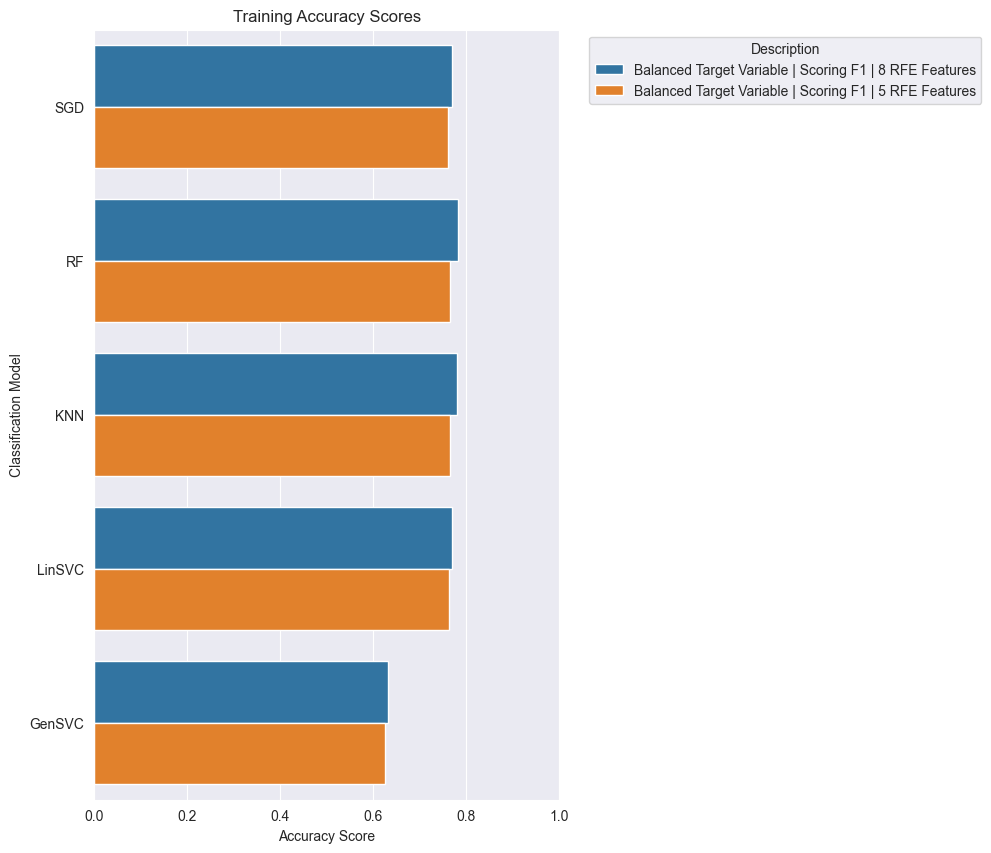

<Figure size 640x480 with 0 Axes>

In [158]:
acc_df = pd.read_csv('DST2 Acc Train.csv')
acc_df
acc_df_t = acc_df.set_index('Description').T.reset_index()
acc_df_melt = acc_df_t.melt(id_vars='index', var_name='Description', value_name='Value')

plt.figure(figsize=(6, 10))
sns.set_style("darkgrid")
sns.barplot(x='Value', y='index', hue='Description', data=acc_df_melt)
plt.xlabel('Accuracy Score')
plt.ylabel('Classification Model')
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Training Accuracy Scores')
plt.xlim(0,1)
plt.show()

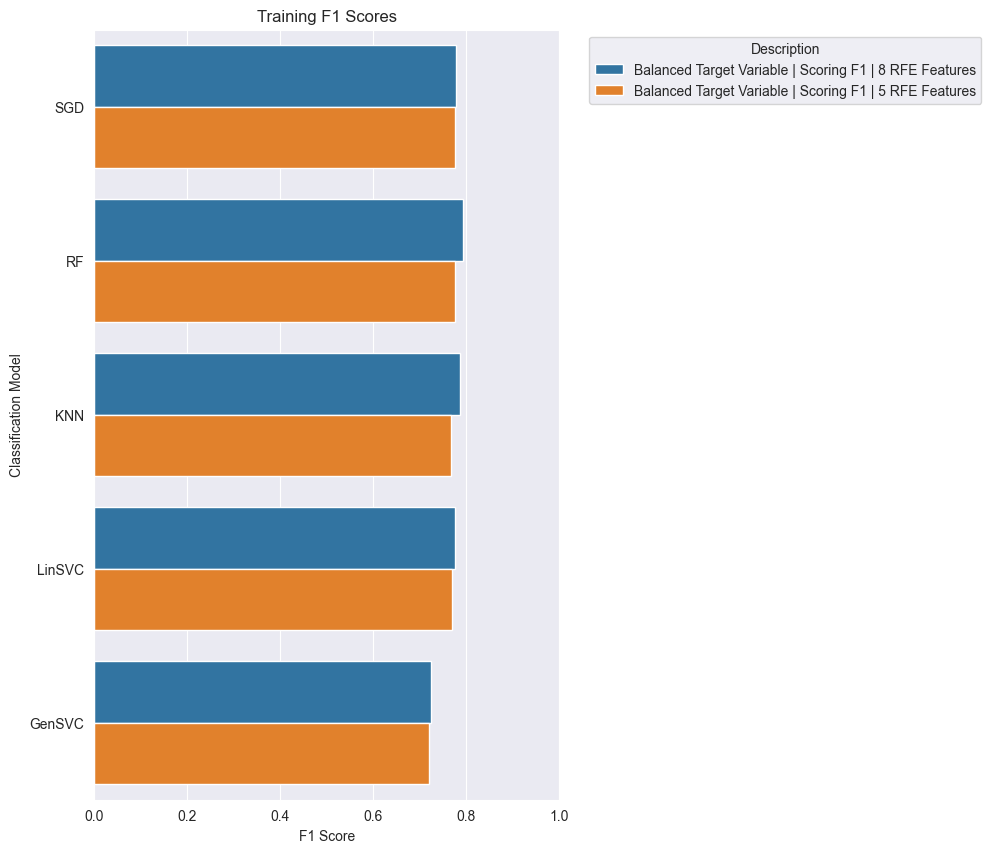

<Figure size 640x480 with 0 Axes>

In [159]:
f1_df = pd.read_csv('DST2 F1 Train.csv')
f1_df
f1_df_t = f1_df.set_index('Description').T.reset_index()
f1_df_melt = f1_df_t.melt(id_vars='index', var_name='Description', value_name='Value')

plt.figure(figsize=(6, 10))
sns.set_style("darkgrid")
sns.barplot(x='Value', y='index', hue='Description', data=f1_df_melt)
plt.xlabel('F1 Score')
plt.ylabel('Classification Model')
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Training F1 Scores')
plt.xlim(0,1)
plt.show()

Best Hyperparameters

With 5 Features
Linear SVC best params:  {'C': 10, 'max_iter': 2500}

With 8 Features
SGD best params:  {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}
Random Forest best params:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
KNN best params:  {'n_neighbors': 19, 'weights': 'uniform'}
SVC best params:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 2500}